In [39]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import category_encoders as ce

In [40]:
df=pd.read_csv("Housing.csv")

In [41]:
df.shape

(545, 13)

# EDA & pre-processing

1.Display the data

2.Check for Datatype using info() and check for null values

3.Statistics about Data

4.Check for Outliers

5.Explore Categorical and Numerical Data

6.Feature Engineering

7.Check for Duplicates

8.Encoding

9.Normalization

In [42]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [44]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","Null_ratio"])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtypes"])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
num_unique,219,284,6,4,4,2,2,2,2,2,4,2,3
dtypes,int64,int64,int64,int64,int64,object,object,object,object,object,int64,object,object


In [46]:
columns=df.columns.tolist()
columns.append(columns.pop(columns.index("price")))
df=df[columns]
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [47]:
cols="mainroad guestroom basement hotwaterheating airconditioning prefarea furnishingstatus".split()
df[cols]=df[cols].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   area              545 non-null    int64   
 1   bedrooms          545 non-null    int64   
 2   bathrooms         545 non-null    int64   
 3   stories           545 non-null    int64   
 4   mainroad          545 non-null    category
 5   guestroom         545 non-null    category
 6   basement          545 non-null    category
 7   hotwaterheating   545 non-null    category
 8   airconditioning   545 non-null    category
 9   parking           545 non-null    int64   
 10  prefarea          545 non-null    category
 11  furnishingstatus  545 non-null    category
 12  price             545 non-null    int64   
dtypes: category(7), int64(6)
memory usage: 30.3 KB


**Check for duplicated**

In [48]:
df.duplicated().sum()

0

**Statistics about data**

In [49]:
df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [50]:
df.describe(include="category")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


**Visualization**

In [51]:
numeric_df=df.select_dtypes("number")
numeric_df

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000
...,...,...,...,...,...,...
540,3000,2,1,1,2,1820000
541,2400,3,1,1,0,1767150
542,3620,2,1,1,0,1750000
543,2910,3,1,1,0,1750000


In [52]:
categorical_df=df.select_dtypes("category")
categorical_df

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


<function matplotlib.pyplot.show(close=None, block=None)>

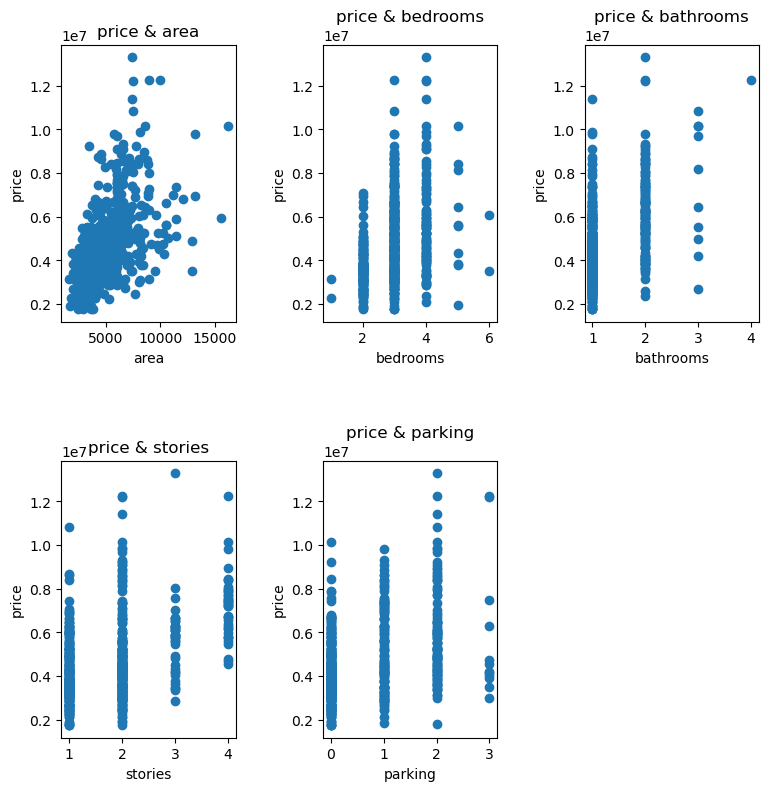

In [53]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(2,3,i+1)
    plt.scatter(df[col],df["price"])
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f"price & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

In [54]:
corr=numeric_df.corr()
corr

,area,bedrooms,bathrooms,stories,parking,price
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.535997
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,0.366494
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.517545
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.420712
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.384394
price,0.535997,0.366494,0.517545,0.420712,0.384394,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

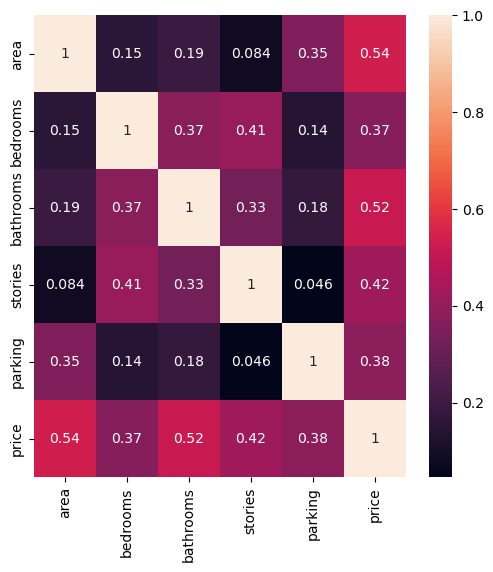

In [55]:
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

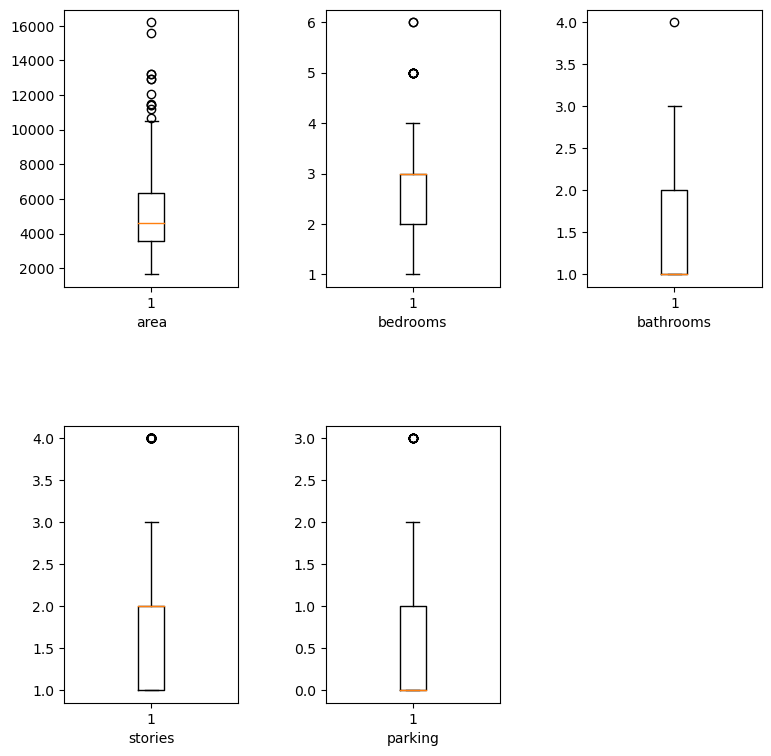

In [56]:
plt.figure(figsize=(9,9))
for i,col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

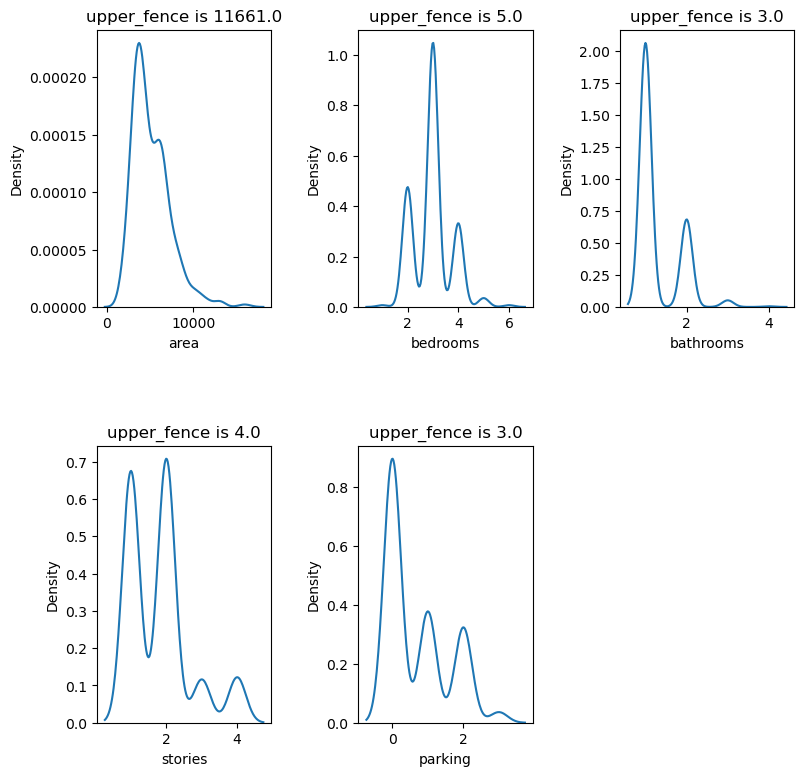

In [57]:
plt.figure(figsize=(9,9))
for i,col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(2,3,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    lower_fence=m-3*s
    plt.title(f"upper_fence is {np.round(upper_fence)}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

**Replace outliers**

In [58]:
for col in numeric_df.columns[:-1]:
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    upper_fence=Q3+1.5*IQR
    ind=df[df[col]>np.round(upper_fence)].index
    ratio=1-(df[df[col]<=np.round(upper_fence)].shape[0]/df.shape[0])
    df.loc[ind,col:col]=np.round(upper_fence)
    print(f"Upper fence of {col} is: {upper_fence}")
    print(f"Ration of Outliers {ratio}")
    print(df[col].max())
    print("------------")

Upper fence of area is: 10500.0
Ration of Outliers 0.022018348623853212
10500
------------
Upper fence of bedrooms is: 4.5
Ration of Outliers 0.022018348623853212
4
------------
Upper fence of bathrooms is: 3.5
Ration of Outliers 0.0
4
------------
Upper fence of stories is: 3.5
Ration of Outliers 0.0
4
------------
Upper fence of parking is: 2.5
Ration of Outliers 0.022018348623853212
2
------------


<function matplotlib.pyplot.show(close=None, block=None)>

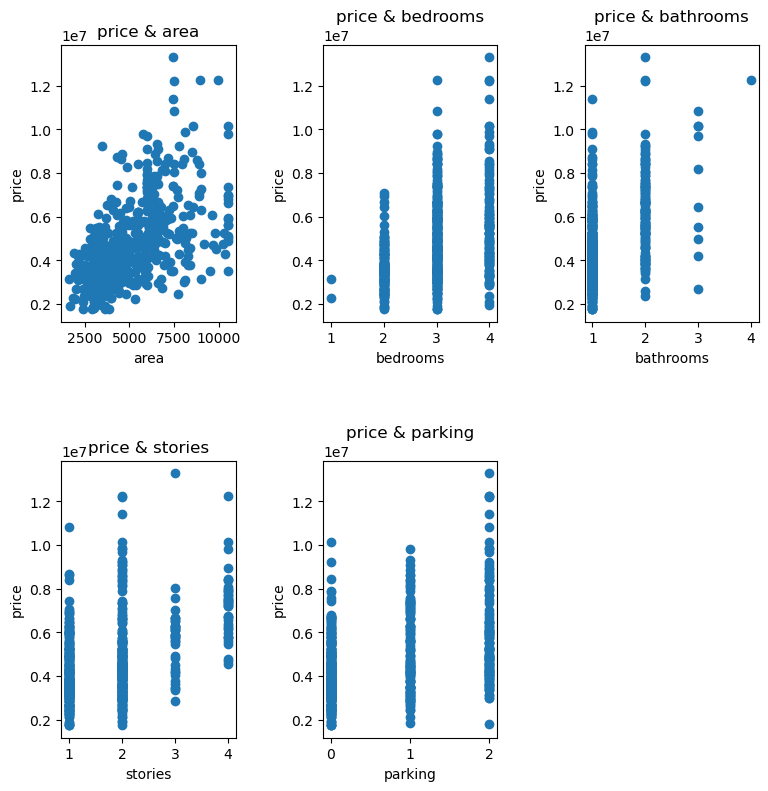

In [59]:
plt.figure(figsize=(9,9))
for i,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(2,3,i+1)
    plt.scatter(df[col],df["price"])
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f"price & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

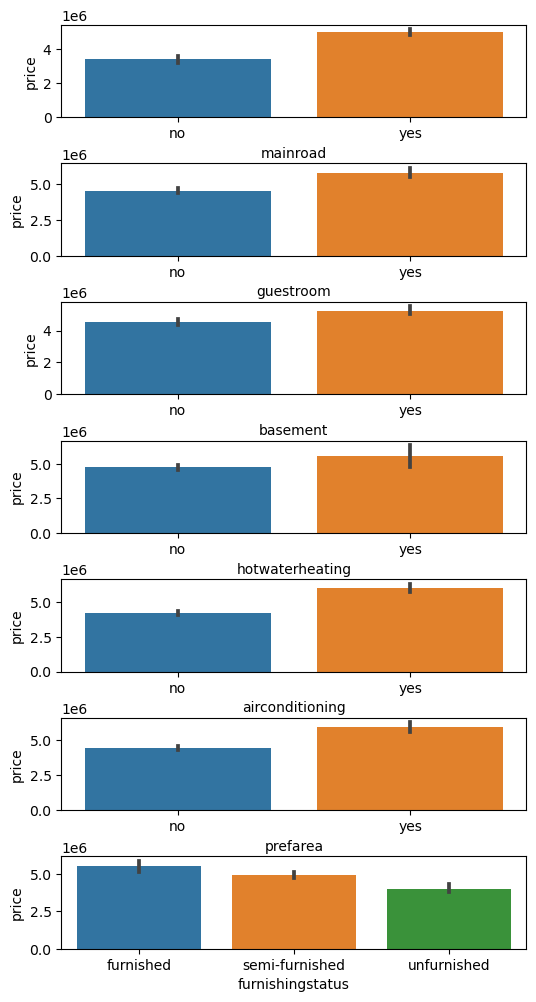

In [60]:
plt.figure(figsize=(6,12))
for i,col in enumerate (categorical_df.columns):
    plt.subplot(7,1,i+1)
    sns.barplot(x=df[col],y=df["price"])
    plt.xlabel(col)
plt.subplots_adjust(hspace=.5)
plt.show()    

**Split data**

In [61]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

# Normalization

In [63]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x_train.select_dtypes("number").columns

In [64]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

x_train[numeric_cols]=x_scaler.fit_transform(x_train[numeric_cols])
y_train[["price"]]=y_scaler.fit_transform(y_train[["price"]])

x_test[numeric_cols]=x_scaler.transform(x_test[numeric_cols])
y_test[["price"]]=y_scaler.transform(y_test[["price"]])

# Encoding

In [65]:
x_train=pd.get_dummies(x_train,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"])
x_test=pd.get_dummies(x_test,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"])

# ML

In [68]:
# Bulid the model and train model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [70]:
y_train=y_scaler.inverse_transform(y_train)
y_test=y_scaler.inverse_transform(y_test)

y_pred_train=y_scaler.inverse_transform(y_pred_train)
y_pred_test=y_scaler.inverse_transform(y_pred_test)

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
training_err = np.round(mean_absolute_error(y_train, y_pred_train))
test_err = np.round(mean_absolute_error(y_test, y_pred_test))
print(test_err)
print(training_err)

833176.0
745405.0


In [72]:
train_acc = (abs(y_pred_train - y_train) < 100).sum() / y_train.shape[0] * 100 
test_acc = (abs(y_pred_test - y_test) < 100).sum() / y_test.shape[0] * 100 
print(train_acc)
print(test_acc)

0.0
0.0
